# HSE 2023: Введение в машинное обучение БИ 23/24

## ДЗ 2

# Внимание!
Если в задании просят объяснить что-либо, то это значит, что требуется письменный ответ, который является частью задания и оценивается

Мы только принимаем ipynb ноутбуки. Если вы используете Google Colab, то вам необходимо скачать ноутбук перед сдачей ДЗ


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
# from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Данные

Для этого ДЗ мы будем использовать датасет треков со стримингового сервиса Spotify

**Описание данных**

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

**Целевая переменная**
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

In [107]:
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy'], axis=1)
columns = X.columns

## Линейная регрессия

#### 0. [0.25 балла] Закодируйте категориальные признаки. Объясните выбранный вами метод.

In [108]:
print(data.dtypes)

artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [109]:
print(data.head())

                  artists                                         album_name  \
0             Gen Hoshino                                             Comedy   
1            Ben Woodward                                   Ghost (Acoustic)   
2  Ingrid Michaelson;ZAYN                                     To Begin Again   
3            Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...   
4        Chord Overstreet                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.

In [110]:
categorical_columns = X.select_dtypes(include = 'object').columns

X[categorical_columns] = TargetEncoder().fit_transform(X[categorical_columns],y)


In [111]:
X.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0.596932,0.461000,0.461000,73,230666,False,0.676,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0.440538
1,0.464135,0.166000,0.128751,55,149610,False,0.420,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0.440538
2,0.640967,0.640967,0.640967,57,210826,False,0.438,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0.432249
3,0.130326,0.641379,0.278445,71,201933,False,0.266,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0.440538
4,0.384315,0.717420,0.649328,82,198853,False,0.618,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0.440538


So as we can see, there are a lot of categories in entire feature from categorical_columns and that means it would be great to not use one hot encoder because one hot encoder creates a separate feature for every categorie. In addition, it would make sparse dataframe which is hard to calculate.

Also we shouldnt use label encoder, because it creates weight difference between feature's categories based on linear models.

That's why I chose Target Encoder. The main disadvantage is leaking target values in X and in consequence of this we may get overfitting.  

#### 1. [0.25 балла] Разбейте данные на train и test с пропорцией 75:25 и random_state=7. 

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=7)


#### 2. [0.75 балла] Обучите модели на train'е, исключив категориальные признаки, используя библиотеку StatsModels и примените ее к test'у; используйте $RMSE$ и $R ^ 2$ в качестве метрики качества. Попробуйте также применить реализации линейной регрессии из sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.03$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.05$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.4$

Не забывайте скейлить данные с помощью StandardScaler перед обучением моделей! 

In [113]:
scaler = StandardScaler()

X_train[X_train.drop(categorical_columns,axis = 1).columns] = scaler.fit_transform(X_train[X_train.drop(categorical_columns,axis = 1).columns])

X_test[X_test.drop(categorical_columns,axis = 1).columns] = scaler.transform(X_test[X_test.drop(categorical_columns,axis = 1).columns])


X_train_temp = X_train.drop(categorical_columns,axis = 1)

X_test_temp = X_test.drop(categorical_columns,axis = 1)

In [114]:

X_train_sm = sm.add_constant(X_train_temp)

#model = sm.OLS(y_train, X_train_sm).fit()

#X_test_sm = sm.add_constant(X_test_temp)
#y_pred = model.predict(X_test_sm)

#rmse_statsmodels = np.sqrt(mean_squared_error(y_test, y_pred))
#r2_statsmodels = r2_score(y_test, y_pred)

linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.03)
lasso_reg = Lasso(alpha=0.05)
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.4)

linear_reg.fit(X_train_temp, y_train)
ridge_reg.fit(X_train_temp, y_train)
lasso_reg.fit(X_train_temp, y_train)
elastic_net.fit(X_train_temp, y_train)

y_pred_linear = linear_reg.predict(X_test_temp)
y_pred_ridge = ridge_reg.predict(X_test_temp)
y_pred_lasso = lasso_reg.predict(X_test_temp)
y_pred_elastic = elastic_net.predict(X_test_temp)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
r2_elastic = r2_score(y_test, y_pred_elastic)

#print("StatsModels - RMSE:", rmse_statsmodels)
#print("StatsModels - R^2:", r2_statsmodels)
print("Linear Regression - RMSE:", rmse_linear)
print("Linear Regression - R^2:", r2_linear)
print("Ridge Regression - RMSE:", rmse_ridge)
print("Ridge Regression - R^2:", r2_ridge)
print("Lasso Regression - RMSE:", rmse_lasso)
print("Lasso Regression - R^2:", r2_lasso)
print("ElasticNet - RMSE:", rmse_elastic)
print("ElasticNet - R^2:", r2_elastic)

Linear Regression - RMSE: 0.12150856959639444
Linear Regression - R^2: 0.7650038163295098
Ridge Regression - RMSE: 0.1215085689126635
Ridge Regression - R^2: 0.7650038189741655
Lasso Regression - RMSE: 0.14710712047919064
Lasso Regression - R^2: 0.6555593645544673
ElasticNet - RMSE: 0.12246439000639749
ElasticNet - R^2: 0.7612921836726962


#### 3. [0.25 балла] Повторите шаги из предыдущего пункта, добавив категориальные признаки. Прокомментируйте изменения значений метрик качества

In [115]:

X_train_sm = sm.add_constant(X_train)

#model = sm.OLS(y_train, X_train_sm).fit()

#X_test_sm = sm.add_constant(X_test_temp)
#y_pred = model.predict(X_test_sm)

#rmse_statsmodels = np.sqrt(mean_squared_error(y_test, y_pred))
#r2_statsmodels = r2_score(y_test, y_pred)

linear_reg_all = LinearRegression()
ridge_reg_all = Ridge(alpha=0.03)
lasso_reg_all = Lasso(alpha=0.05)
elastic_net_all = ElasticNet(alpha=0.01, l1_ratio=0.4)

linear_reg_all.fit(X_train, y_train)
ridge_reg_all.fit(X_train, y_train)
lasso_reg_all.fit(X_train, y_train)
elastic_net_all.fit(X_train, y_train)

y_pred_linear = linear_reg_all.predict(X_test)
y_pred_ridge = ridge_reg_all.predict(X_test)
y_pred_lasso = lasso_reg_all.predict(X_test)
y_pred_elastic = elastic_net_all.predict(X_test)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
r2_elastic = r2_score(y_test, y_pred_elastic)

#print("StatsModels - RMSE:", rmse_statsmodels)
#print("StatsModels - R^2:", r2_statsmodels)
print("Linear Regression - RMSE:", rmse_linear)
print("Linear Regression - R^2:", r2_linear)
print("Ridge Regression - RMSE:", rmse_ridge)
print("Ridge Regression - R^2:", r2_ridge)
print("Lasso Regression - RMSE:", rmse_lasso)
print("Lasso Regression - R^2:", r2_lasso)
print("ElasticNet - RMSE:", rmse_elastic)
print("ElasticNet - R^2:", r2_elastic)

Linear Regression - RMSE: 0.1064510281222755
Linear Regression - R^2: 0.8196373061278697
Ridge Regression - RMSE: 0.10645102339602511
Ridge Regression - R^2: 0.8196373221434825
Lasso Regression - RMSE: 0.14710712047919064
Lasso Regression - R^2: 0.6555593645544673
ElasticNet - RMSE: 0.1131929237114656
ElasticNet - R^2: 0.7960679203987753


As we can see all scores have gotten better in compare to the previous ones  

#### 4. [1 балл] Исследуйте значения параметров полученных моделей и проверьте какие веса получились нулевыми. Прокомментируйте значимость коэффициентов, обшую значимость модели и остальные факторы из результирующей таблицы 

In [144]:
# I have stolen this code from 4 seminar  
def show_weights(features, weights, scales,name):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    plt.title(name, fontsize = 40,loc = 'center')
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

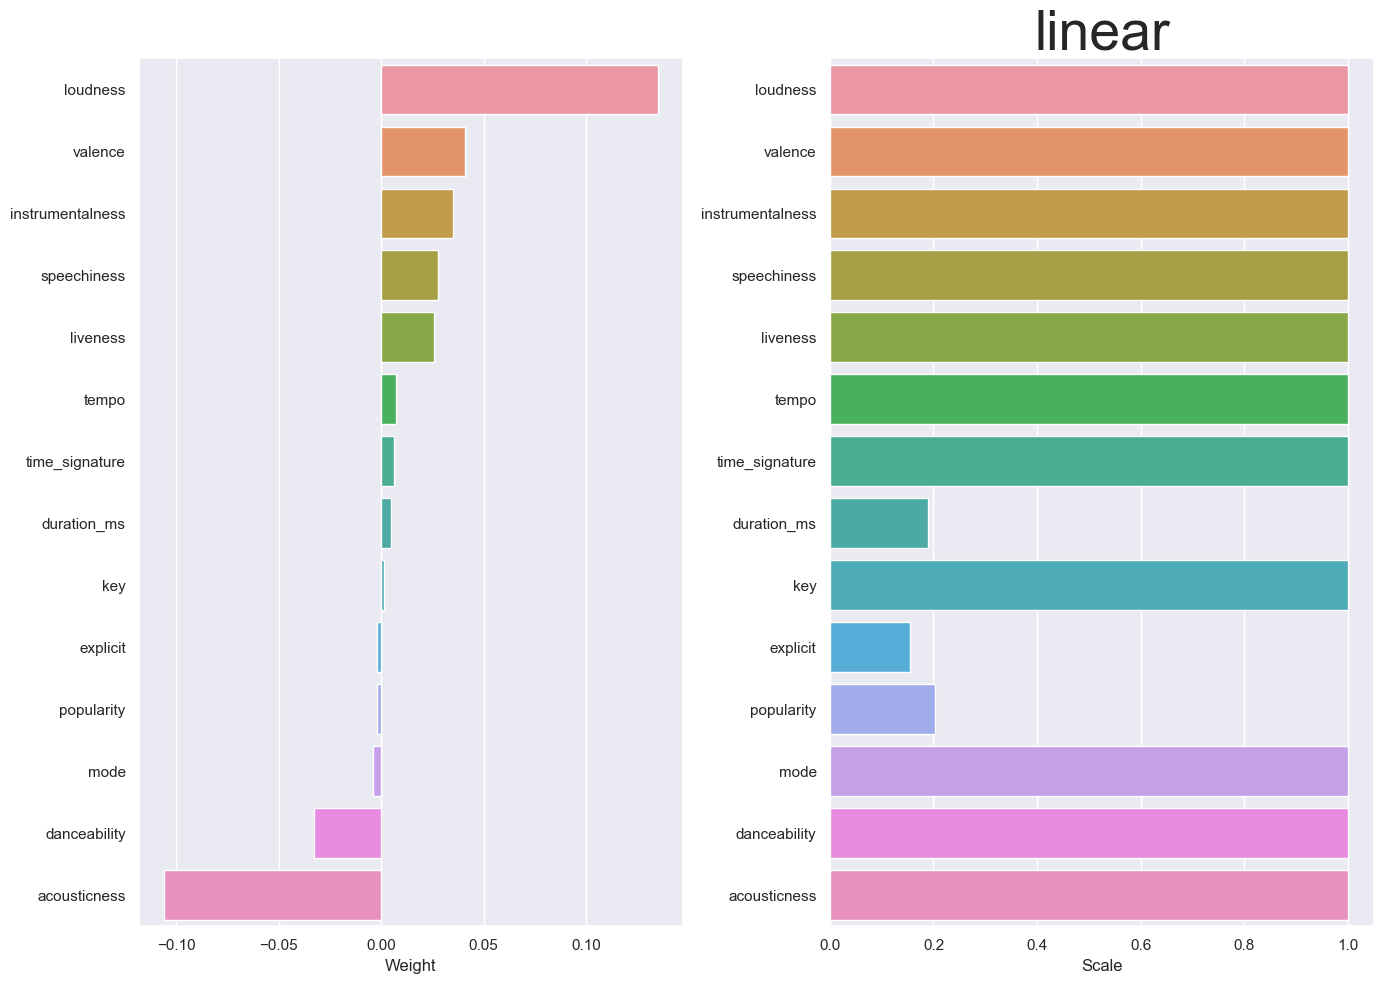

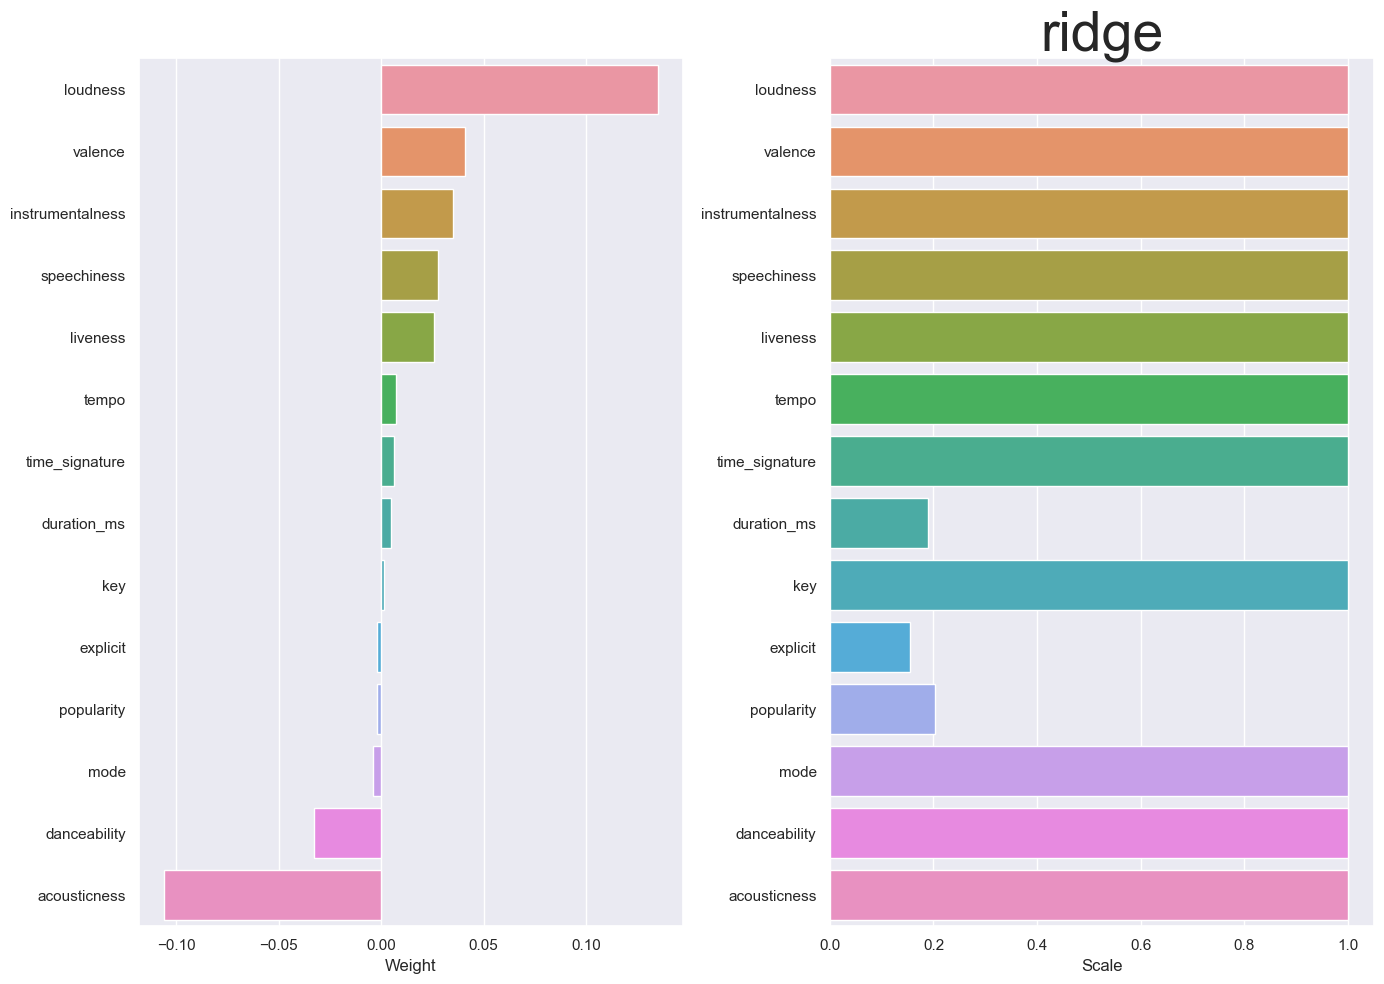

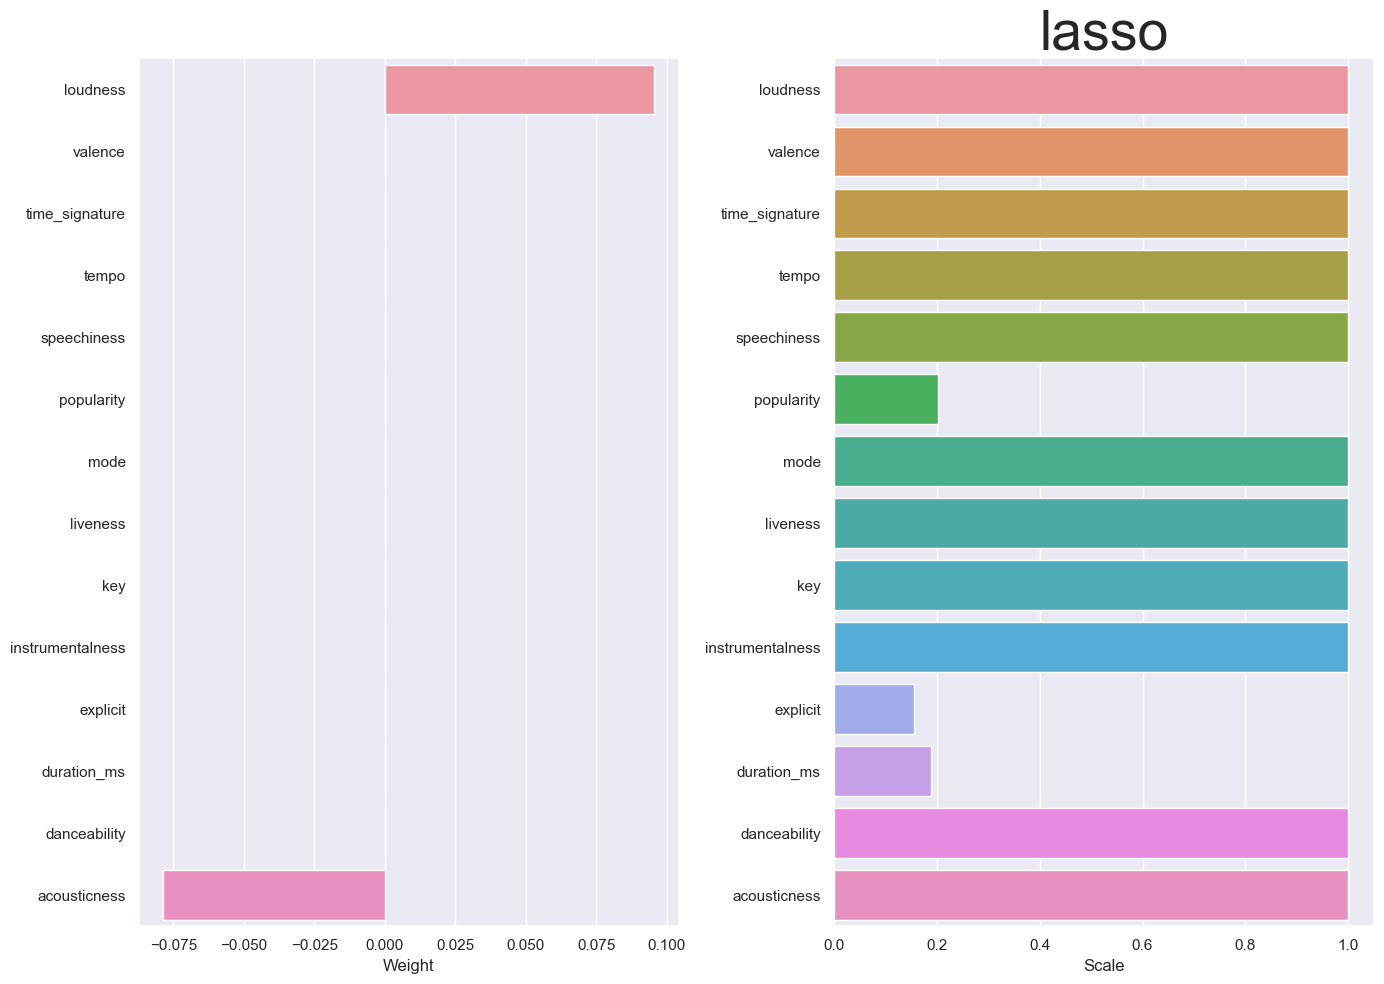

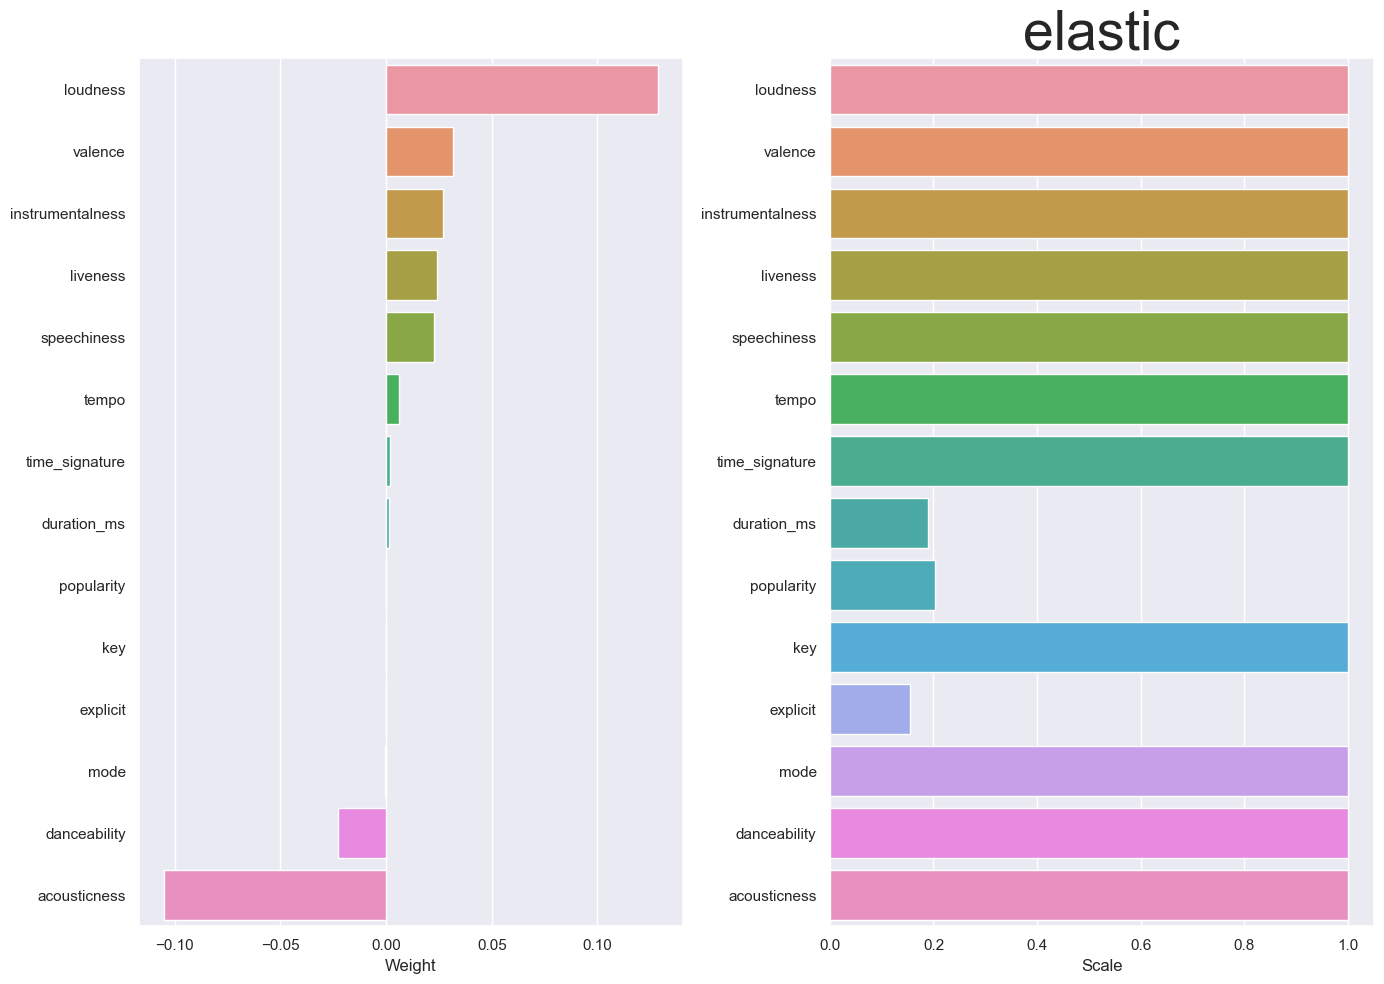

In [145]:
scales = pd.Series(data = X_train.std(axis=0), index=X_train.columns)

columns_without_categorical = X_train.drop(categorical_columns,axis = 1).columns

X_train_without_categorical = X_train[columns_without_categorical]

#show_weights(X_train.columns, linear_reg.coef_, scales) #TODO:
show_weights(X_train_without_categorical.columns, linear_reg.coef_, scales,'linear')
show_weights(X_train_without_categorical.columns, ridge_reg.coef_, scales,'ridge')
show_weights(X_train_without_categorical.columns, lasso_reg.coef_, scales,'lasso')
show_weights(X_train_without_categorical.columns, elastic_net.coef_, scales,'elastic')


#### 5. [1 балл] Реализуйте один из алгоритмов отбора признаков (Elimination by P-value, Forward elimination, Backward elimination), сделайте выводы.

In [118]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

#### 6. [1 балл] Найдите лучший (по RMSE) $\alpha$ для регрессиии Lasso, используя кросс-валидацию на 5 фолдов. Вы должны выбрать значение из промежутка $[10^{-4}, 10^{3}]$.

Best alpha = 0.0001


Text(0, 0.5, 'CV score')

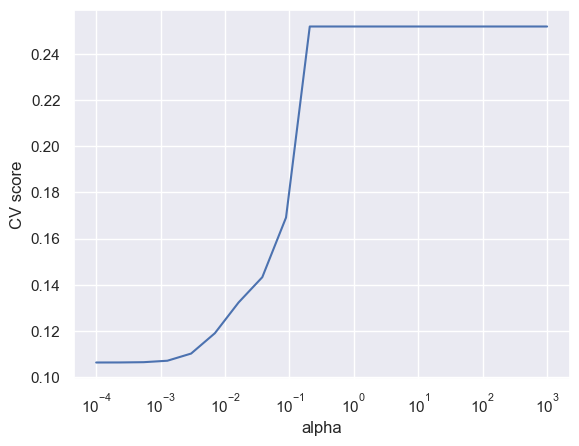

In [133]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, 3, 20)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train, y_train)


best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["root_mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")



## Градиентный спуск

#### 7. [3.5 балла] Имплементируйте  Ridge регрессию для MSE loss, обученную на градиентом спуске.


Все вычисления должны быть векторизованы, а циклы Python можно использовать только для итераций градиентного спуска. В качестве критерия остановки необходимо использовать (одновременно):

* проверка абсолютной нормы разницы весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, заданного параметром `tolerance`);

* достижение максимального количества итераций (например, 10000, заданного параметром `max_iter`).

Вам необходимо выполнить:

* Полный градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Стохастический градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ является оценкой градиента по набору объектов, выбранных случайным образом.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$

Чтобы убедиться, что процесс оптимизации действительно выполняется, мы будем использовать атрибут класса `loss_history`. После вызова метода fit он должен содержать значения функции потерь для всех итераций, начиная с первой (до первого шага по антиградиенту).


Вам нужно инициализировать веса случайным вектором из нормального распределения. Ниже приведен шаблон, который должен содержать код, реализующий все варианты моделей.

In [120]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """
        
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []

        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        
        pass
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        pass

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        pass

#### 8. [1 балл] Натренируйте и провалидируйте "ручные" модели на тех же даннных, сравните качество с моделями из Sklearn и StatsModels. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Соответствует ли оно вашим ожиданиям?

In [121]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

#### 9. [1 балл] Постройте графики (там же) зависимости значения функции потерь от номера итерации для всех моделей (полного градиентого спуска, стохастического гс, Momentum и Adagrad). Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.


Не забывайте о том, как должен выглядеть *красивый* график!

In [122]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ